In [1]:
import math
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
'''
line = {
    's': ,
    'e': ,
    'equation': {'m':, 'b':}
}
'''

def lines_xy(radians, id):
    lines = {}    
    for i in range(len(id)):
        line_id = id[i][1]
        rad = radians[i]
        if (line_id not in lines.keys()):
            lines[line_id] = {}    
        if (id[i][0] == 's'):
            lines[line_id]['s'] = (math.cos(rad), math.sin(rad))
        else:
            lines[line_id]['e'] = (math.cos(rad), math.sin(rad))
    return lines

def line_equation(s, e):
    m = (e[1] - s[1]) / (e[0] - s[0])
    b = s[1] - m * s[0]
    return m, b

def line_intersection(l_1, l_2):
    def delta(a, b):
        return a[0] * b[1] - a[1] * b[0]
    
    x_diff = (l_1[0][0] - l_1[1][0], l_2[0][0] - l_2[1][0])
    y_diff = (l_1[0][1] - l_1[1][1], l_2[0][1] - l_2[1][1])

    div = delta(x_diff, y_diff)
    if (div == 0):
       return None, None

    d = (delta(*l_1), delta(*l_2))
    x = delta(d, x_diff) / div
    y = delta(d, y_diff) / div
    return x, y

def intersection_in_circle(x, y, radius = 1):
    if not x or not y:
        return False
    return (x ** 2 + y ** 2) <= radius

def chord_lines(radians, id):
    lines = {}
    for i in range(len(id)):
        line_id = id[i][1]
        rad = radians[i]
        if (line_id not in lines.keys()):
            lines[line_id] = [-1, -1]    
        if (id[i][0] == 's'):
            lines[line_id][0] = radians[i]
        else:
            lines[line_id][1] = radians[i]
    return lines

def intersect(line_1, line_2):
    if (line_1[0] <= line_2[0] and line_1[1] >= line_2[0] and line_1[1] <= line_2[1]):
        return 1
    return 0

In [7]:
def draw(radians, id, radius = 1):
    intersections = []
    theta = np.linspace(0, 2 * np.pi)
    circle_a = radius * np.cos(theta)
    circle_b = radius * np.sin(theta)
    
    lines = lines_xy(radians, id)
    for line in lines:
        m, b = line_equation(lines[line]['s'], lines[line]['e'])
        lines[line]['equation'] = 'y = {}*x + {}'.format(m, b)
        
    line_ids = list(lines.keys())
    for i in range(len(line_ids) - 1):
        for j in range(i + 1, len(line_ids)):
            x, y = line_intersection(
                (lines[line_ids[i]]['s'], lines[line_ids[i]]['e']),
                (lines[line_ids[j]]['s'], lines[line_ids[j]]['e'])
            )
            if (intersection_in_circle(x, y)):
                intersections.append((x, y))
   
    figure, axes = plt.subplots()
    axes.set_aspect(1)
    
    for line in lines:
        line = lines[line]
        plt.plot([line['s'][0], line['e'][0]], [line['s'][1], line['e'][1]], 'ro-')
    for intersection in intersections:
        plt.plot(intersection[0], intersection[1], 'bo')
        
    print('Lines ({}) Start and End point as well as equation:'.format(len(lines)))
    pprint(lines)
    print()
    print('List of valid intersections:')
    pprint(intersections)
    print()
    
    plt.plot(circle_a, circle_b)
    
    plt.title('Chords')
    plt.show()

In [8]:
def chord_mathematical(radians, id, radius = 1):
    if (len(radians) % 2 != 0 or len(id) % 2 != 0):
        return False
    
    intersections = 0
    lines = lines_xy(radians, id)
    
    line_ids = list(lines.keys())
    for i in range(len(line_ids) - 1):
        for j in range(i + 1, len(line_ids)):
            x, y = line_intersection(
                (lines[line_ids[i]]['s'], lines[line_ids[i]]['e']),
                (lines[line_ids[j]]['s'], lines[line_ids[j]]['e'])
            )
            if (intersection_in_circle(x, y)):
                intersections += 1

    return intersections
    

In [9]:
def chord_intersection(radians, id):
    if (len(radians) % 2 != 0 or len(id) % 2 != 0):
        return False
    
    intersections = 0
    lines = chord_lines(radians, id)
    line_ids = list(lines.keys())
    for i in range(len(line_ids) - 1):
        for j in range(i + 1, len(line_ids)):
            intersections += intersect(lines[line_ids[i]], lines[line_ids[j]])
    return intersections

Lines (4) Start and End point as well as equation:
{'1': {'e': (-0.9899924966004454, 0.1411200080598672),
       'equation': 'y = 0.18114695257159807*x + 0.32045413188778615',
       's': (0.8775825618903728, 0.479425538604203)},
 '2': {'e': (-0.197888814609109, 0.9802244727880455),
       'equation': 'y = -0.3047362859358844*x + 0.9199205703958109',
       's': (0.7109135380122773, 0.7032794192004103)},
 '3': {'e': (-0.7120327163983102, -0.7021462887308054),
       'equation': 'y = 2.088295075202706*x + 0.7847881263069909',
       's': (0.10062573338693173, 0.9949243497775809)},
 '4': {'e': (0.28366218546322625, -0.9589242746631385),
       'equation': 'y = -1.347579552305043*x + -0.576666913770734',
       's': (-0.8355887771314077, 0.5493554364271266)}}

List of valid intersections:
[(-0.24347033610509924, 0.2763502224607646),
 (-0.5868420824762977, 0.2141494770064343),
 (0.05646914883076369, 0.9027123717111633),
 (-0.3962470077277738, -0.0426925484947277)]



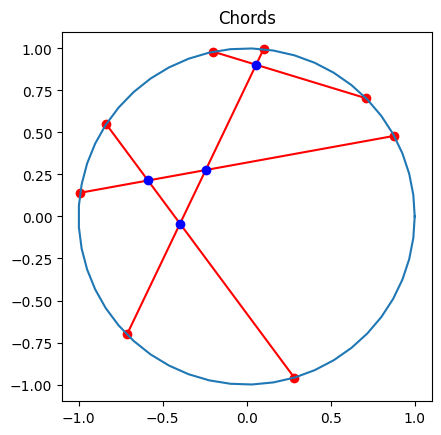

In [10]:
radians = [0.5, 0.78, 1.47, 1.77, 2.56, 3.00, 3.92, 5.00]
id =      ['s1', 's2', 's3', 'e2', 's4', 'e1', 'e3', 'e4']
# radians = [0.78, 1.47, 1.77, 3.92]
# id =      ['s1', 's2', 'e1', 'e2']
draw(radians, id)

In [11]:
print('Intersections using mathematical method:', chord_mathematical(radians, id))

Intersections using mathematical method: 4


In [12]:
print('Intersections:', chord_intersection(radians, id))

Intersections: 4
